In [1]:
import surprise
import json
import pandas as pd
import numpy as np
from collections import defaultdict

In [1]:
! head -n 20 ./sales1.json

In [2]:
with open('./sales1.json', 'r') as f:
    data = json.load(f)

In [3]:
data.keys()

dict_keys(['rows'])

In [4]:
data['rows'][:5]

[{'USER_ID': 31106,
  'ORDER_ID': 159076,
  'PRODUCT_ID': 7372,
  'PRICE': 119.92,
  'QUANTITY': 1.0,
  'DATE_PAYED': '2023-07-05 16:55:28',
  'NAME': 'Шницель Ярославский бройлер рубленый 480г',
  'SECTION_ID': 556,
  'ROOT_SECTION_ID': 512},
 {'USER_ID': 31106,
  'ORDER_ID': 159076,
  'PRODUCT_ID': 1359140,
  'PRICE': 132.72,
  'QUANTITY': 1.0,
  'DATE_PAYED': '2023-07-05 16:55:28',
  'NAME': 'Медальоны Ярославский бройлер в рисовых хлопьях 450г',
  'SECTION_ID': 555,
  'ROOT_SECTION_ID': 512},
 {'USER_ID': 31106,
  'ORDER_ID': 159076,
  'PRODUCT_ID': 5654,
  'PRICE': 69.9,
  'QUANTITY': 1.0,
  'DATE_PAYED': '2023-07-05 16:55:28',
  'NAME': 'Макаронные изделия Maltagliati Спагетти тонкие 500г',
  'SECTION_ID': 506,
  'ROOT_SECTION_ID': 502},
 {'USER_ID': 31106,
  'ORDER_ID': 159076,
  'PRODUCT_ID': 1356840,
  'PRICE': 63.92,
  'QUANTITY': 1.0,
  'DATE_PAYED': '2023-07-05 16:55:28',
  'NAME': 'Макаронные изделия Бакалейщики Рожок малютка с томатами и шпинатом 300г',
  'SECTION_ID': 50

In [5]:
df_data = pd.DataFrame(data['rows'])

In [6]:
df_data

USER_ID  ORDER_ID  PRODUCT_ID   PRICE  QUANTITY           DATE_PAYED  \
0         31106    159076        7372  119.92     1.000  2023-07-05 16:55:28   
1         31106    159076     1359140  132.72     1.000  2023-07-05 16:55:28   
2         31106    159076        5654   69.90     1.000  2023-07-05 16:55:28   
3         31106    159076     1356840   63.92     1.000  2023-07-05 16:55:28   
4         31106    159076     1356986   95.92     1.000  2023-07-05 16:55:28   
...         ...       ...         ...     ...       ...                  ...   
149996    20186    141275     1178612   92.90     1.000  2023-04-26 14:05:21   
149997    20186    141275     1250826   12.99     2.000  2023-04-26 14:05:21   
149998    20186    141275     1251990   45.65     1.000  2023-04-26 14:05:21   
149999    20186    141275     1298655  228.60     1.575  2023-04-26 14:05:21   
150000    20186    141275     1358457   43.20     2.000  2023-04-26 14:05:21   

                                                     NAME  SECTION_ID  \
0               Шницель Ярославский бройлер рубленый 480г         556   
1       Медальоны Ярославский бройлер в рисовых хлопья...         555   
2       Макаронные изделия Maltagliati Спагетти тонкие...         506   
3       Макаронные изделия Бакалейщики Рожок малютка с...         506   
4                           Рис Мистраль пропаренный 800г         505   
...                                                   ...         ...   
149996  Масло Золотая капелька подсолнечное дезодориро...         504   
149997                    Булка Риат Хлеб Городская 200г          551   
149998                         Биокефир Здравушка 1% 930г         429   
149999     Сосиски Черкизово Сливочные по-Черкизовски 1кг         514   
150000            Творожок Эконива Персик-абрикос 5% 125г         272   

        ROOT_SECTION_ID  
0                   512  
1                   512  
2                   502  
3                   502  
4                   502  
...                 ...  
149996              502  
149997              251  
149998              263  
149999              512  
150000              263  

[150001 rows x 9 columns]

In [8]:
df_data[['PRICE', 'QUANTITY']].describe()

PRICE       QUANTITY
count  150001.000000  150001.000000
mean      124.149455       1.790367
std       151.642650       3.294646
min         1.000000       0.001000
25%        49.180000       1.000000
50%        79.900000       1.000000
75%       149.900000       2.000000
max     12050.000000     200.000000

In [9]:
# STOP_ROOT_SECTIONS = [566,]

In [7]:
df_data.nunique()

USER_ID             3703
ORDER_ID           16102
PRODUCT_ID          9186
PRICE              20968
QUANTITY            3894
DATE_PAYED         14402
NAME                9165
SECTION_ID           237
ROOT_SECTION_ID       20
dtype: int64

In [8]:
data1 = df_data.groupby('USER_ID').count()[['ORDER_ID', 'PRODUCT_ID']]

In [9]:
data1[data1['PRODUCT_ID'] > 2]

ORDER_ID  PRODUCT_ID
USER_ID                      
1              18          18
65             36          36
70              3           3
80             49          49
81            117         117
...           ...         ...
74079           3           3
74115           5           5
74119           5           5
74122           4           4
74127           4           4

[3120 rows x 2 columns]

In [10]:
users_personal = set(data1[data1['PRODUCT_ID'] > 2].index)

In [11]:
len(users_personal)

3120

In [12]:
products = {k:v for (k,v) in zip(df_data['PRODUCT_ID'], df_data['NAME'])}

In [13]:
products

{7372: 'Шницель Ярославский бройлер рубленый 480г',
 1359140: 'Медальоны Ярославский бройлер в рисовых хлопьях 450г',
 5654: 'Макаронные изделия Maltagliati Спагетти тонкие 500г',
 1356840: 'Макаронные изделия Бакалейщики Рожок малютка с томатами и шпинатом 300г',
 1356986: 'Рис Мистраль пропаренный 800г',
 390856: 'Картофель белый новый урожай 1кг',
 3903: 'Карпаччо Мясной Двор из мяса птицы 1кг',
 1359443: 'Печенье Кухмастер Топленое молоко сахарное 700г',
 1251040: 'Укроп свежий 1кг',
 1175759: 'Набор контейнеров Гала-Центр 3шт ',
 1220847: 'Набор контейнеров 0.4л 3шт',
 1353327: 'Печенье Яшкино со вкусом Пломбира 220г',
 4475: 'Фисташки не очищенные 1кг',
 390852: 'Лук репчатый красный 1кг',
 1250999: 'Кабачки 1кг',
 2285: 'Бананы 1кг',
 1058887: 'Дыня Колхозница 1кг',
 2291: 'Груша Конференц-Аббат 1кг',
 1170406: 'Виноград Киш-миш черный 1кг',
 1299896: 'Черешня Россия 1кг',
 2340: 'Виноград Киш-миш красный 1кг',
 1296954: 'Сыр Пивная тема Чечил копченый 70г',
 1296943: 'Сыр Пивна

In [44]:
# https://surprise.readthedocs.io/en/stable/

In [14]:
dir(surprise)

['AlgoBase',
 'BaselineOnly',
 'CoClustering',
 'Dataset',
 'KNNBaseline',
 'KNNBasic',
 'KNNWithMeans',
 'KNNWithZScore',
 'NMF',
 'NormalPredictor',
 'Prediction',
 'PredictionImpossible',
 'Reader',
 'SVD',
 'SVDpp',
 'SlopeOne',
 'Trainset',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'accuracy',
 'builtin_datasets',
 'dataset',
 'dump',
 'get_dataset_dir',
 'get_distribution',
 'model_selection',
 'prediction_algorithms',
 'reader',
 'similarities',
 'trainset',
 'utils']

In [15]:
df_data.columns

Index(['USER_ID', 'ORDER_ID', 'PRODUCT_ID', 'PRICE', 'QUANTITY', 'DATE_PAYED',
       'NAME', 'SECTION_ID', 'ROOT_SECTION_ID'],
      dtype='object')

In [16]:
df_data_gr = df_data.groupby(['USER_ID', 'PRODUCT_ID']).agg({
    'PRICE': max,
    'QUANTITY': np.mean
}).reset_index()

In [17]:
df_data_gr

USER_ID  PRODUCT_ID   PRICE  QUANTITY
0             1        2285  103.14     0.680
1             1        2320   55.50     0.686
2             1        2826  309.57     0.380
3             1        5733   57.09     1.000
4             1      389848  214.29     1.000
...         ...         ...     ...       ...
111283    74124     1058584  146.47     3.500
111284    74127        3050  132.80     1.000
111285    74127        8232   72.29     3.000
111286    74127     1056984   50.58     2.000
111287    74127     1358804   36.36     2.000

[111288 rows x 4 columns]

In [18]:
df_data_gr[['PRICE', 'QUANTITY']].describe()

PRICE       QUANTITY
count  111288.000000  111288.000000
mean      125.431345       1.557795
std       159.142644       2.311476
min         1.000000       0.001000
25%        49.127500       1.000000
50%        79.900000       1.000000
75%       149.900000       1.654000
max     12050.000000     150.000000

In [19]:
df_data_gr['rating'] = (df_data_gr['PRICE'].apply(lambda x: np.log10(1+x))
                     * df_data_gr['QUANTITY'].apply(lambda x: np.sqrt(x)))

<AxesSubplot:>

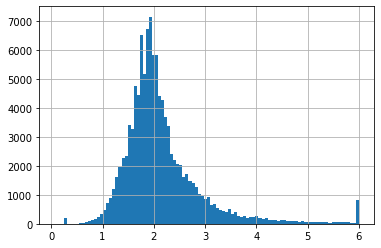

In [25]:
df_data_gr['rating'].hist(bins=100)

In [21]:
df_data_gr['rating'].describe()

count    111288.000000
mean          2.156611
std           0.836286
min           0.064399
25%           1.711385
50%           1.981819
75%           2.363395
max          18.970385
Name: rating, dtype: float64

In [23]:
len(df_data_gr[df_data_gr['rating'] > 6])

778

In [24]:
df_data_gr['rating'] = df_data_gr['rating'].apply(lambda x: x if x < 6 else 6)

In [26]:
reader = surprise.Reader(line_format='user item rating', rating_scale=(1, 5))

In [109]:
# help(surprise.Reader)

In [27]:
df_data_gr.columns

Index(['USER_ID', 'PRODUCT_ID', 'PRICE', 'QUANTITY', 'rating'], dtype='object')

In [28]:
dataset = surprise.Dataset.load_from_df(df_data_gr[['USER_ID', 'PRODUCT_ID', 'rating']], reader)

In [31]:
# help(surprise.Dataset)

In [33]:
# vars(dataset)

In [35]:
# dir(dataset)

## Baseline

In [29]:
bl = surprise.BaselineOnly()

In [32]:
# help(surprise.BaselineOnly)

In [39]:
%%time

surprise.model_selection.cross_validate(bl, dataset, measures=["RMSE", "MAE"], cv=3, verbose=True)

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Evaluating RMSE, MAE of algorithm BaselineOnly on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.5955  0.5979  0.5961  0.5965  0.0010  
MAE (testset)     0.3947  0.3977  0.3942  0.3955  0.0015  
Fit time          0.61    0.63    0.63    0.63    0.01    
Test time         0.67    0.31    0.56    0.51    0.15    
CPU times: user 4.81 s, sys: 35.9 ms, total: 4.84 s
Wall time: 4.87 s


{'test_rmse': array([0.59550918, 0.59785562, 0.5960588 ]),
 'test_mae': array([0.39466477, 0.39767745, 0.39420346]),
 'fit_time': (0.6124494075775146, 0.6346826553344727, 0.6289513111114502),
 'test_time': (0.6662688255310059, 0.31131410598754883, 0.5635495185852051)}

In [40]:
help(surprise.model_selection.cross_validate)

Help on function cross_validate in module surprise.model_selection.validation:

cross_validate(algo, data, measures=['rmse', 'mae'], cv=None, return_train_measures=False, n_jobs=1, pre_dispatch='2*n_jobs', verbose=False)
    Run a cross validation procedure for a given algorithm, reporting accuracy
    measures and computation times.
    
    See an example in the :ref:`User Guide <cross_validate_example>`.
    
    Args:
        algo(:obj:`AlgoBase             <surprise.prediction_algorithms.algo_base.AlgoBase>`):
            The algorithm to evaluate.
        data(:obj:`Dataset <surprise.dataset.Dataset>`): The dataset on which
            to evaluate the algorithm.
        measures(list of string): The performance measures to compute. Allowed
            names are function names as defined in the :mod:`accuracy
            <surprise.accuracy>` module. Default is ``['rmse', 'mae']``.
        cv(cross-validation iterator, int or ``None``): Determines how the
            ``data`` param

## SVD

In [33]:
svdpp1 = surprise.SVDpp(n_factors=6, n_epochs=30, lr_all=0.002, reg_all=0.05, random_state=42)

In [34]:
svdpp2 = surprise.SVDpp(n_factors=10, n_epochs=30, lr_all=0.002, reg_all=0.05, random_state=42)
svdpp3 = surprise.SVDpp(n_factors=20, n_epochs=30, lr_all=0.002, reg_all=0.05, random_state=42)
svdpp4 = surprise.SVDpp(n_factors=40, n_epochs=30, lr_all=0.002, reg_all=0.05, random_state=42)


In [49]:
# help(surprise.SVDpp)

In [35]:
%%time

surprise.model_selection.cross_validate(svdpp1, dataset, measures=["RMSE", "MAE"], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm SVDpp on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.6005  0.5937  0.5960  0.5967  0.0028  
MAE (testset)     0.3979  0.3959  0.3977  0.3972  0.0009  
Fit time          8.09    8.24    7.78    8.04    0.19    
Test time         5.25    4.78    4.50    4.85    0.31    
CPU times: user 39.4 s, sys: 273 ms, total: 39.7 s
Wall time: 40.1 s


{'test_rmse': array([0.60050573, 0.59373204, 0.59599755]),
 'test_mae': array([0.39785209, 0.39589645, 0.39772991]),
 'fit_time': (8.093499183654785, 8.235107421875, 7.7814202308654785),
 'test_time': (5.254615068435669, 4.7803003787994385, 4.503255128860474)}

In [36]:
%%time

surprise.model_selection.cross_validate(svdpp2, dataset, measures=["RMSE", "MAE"], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm SVDpp on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.5996  0.5882  0.6033  0.5971  0.0064  
MAE (testset)     0.3986  0.3944  0.3991  0.3974  0.0021  
Fit time          10.99   11.45   14.17   12.20   1.40    
Test time         4.61    4.76    4.79    4.72    0.08    
CPU times: user 52.5 s, sys: 163 ms, total: 52.7 s
Wall time: 52.8 s


{'test_rmse': array([0.5995966 , 0.58824876, 0.6033307 ]),
 'test_mae': array([0.39864063, 0.39436932, 0.39909919]),
 'fit_time': (10.986173152923584, 11.452684879302979, 14.16671085357666),
 'test_time': (4.611953973770142, 4.760575771331787, 4.794293165206909)}

In [37]:
%%time

surprise.model_selection.cross_validate(svdpp3, dataset, measures=["RMSE", "MAE"], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm SVDpp on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.6000  0.5936  0.5961  0.5966  0.0026  
MAE (testset)     0.3988  0.3964  0.3972  0.3975  0.0010  
Fit time          16.60   17.51   19.95   18.02   1.42    
Test time         5.19    5.28    5.07    5.18    0.09    
CPU times: user 1min 10s, sys: 282 ms, total: 1min 10s
Wall time: 1min 11s


{'test_rmse': array([0.59997727, 0.59361293, 0.59614227]),
 'test_mae': array([0.39883386, 0.39641141, 0.39720831]),
 'fit_time': (16.59543466567993, 17.50688910484314, 19.948162317276),
 'test_time': (5.18799614906311, 5.279640197753906, 5.071493148803711)}

In [45]:
%%time

surprise.model_selection.cross_validate(svdpp4, dataset, measures=["RMSE", "MAE"], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm SVDpp on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.6038  0.5954  0.5957  0.5983  0.0039  
MAE (testset)     0.4027  0.3978  0.3978  0.3994  0.0023  
Fit time          39.69   37.96   39.35   39.00   0.75    
Test time         5.05    5.43    5.67    5.38    0.26    
CPU times: user 2min 14s, sys: 228 ms, total: 2min 14s
Wall time: 2min 14s


{'test_rmse': array([0.60383765, 0.59537065, 0.59565838]),
 'test_mae': array([0.40265502, 0.39782274, 0.39778782]),
 'fit_time': (39.69124984741211, 37.959216833114624, 39.35435652732849),
 'test_time': (5.045139789581299, 5.427048683166504, 5.670206308364868)}

In [78]:
param_grid = {'n_factors': [6, 10, 20, 40, 100], 'n_epochs': [50,], 
              'biased': [True, ], 'lr_all': [0.005, 0.001], 'reg_all': [0.05, 0.02],
              'random_state': [42, ]
             }

In [83]:
help(surprise.SVD)

Help on class SVD in module surprise.prediction_algorithms.matrix_factorization:

class SVD(surprise.prediction_algorithms.algo_base.AlgoBase)
 |  SVD(n_factors=100, n_epochs=20, biased=True, init_mean=0, init_std_dev=0.1, lr_all=0.005, reg_all=0.02, lr_bu=None, lr_bi=None, lr_pu=None, lr_qi=None, reg_bu=None, reg_bi=None, reg_pu=None, reg_qi=None, random_state=None, verbose=False)
 |  
 |  The famous *SVD* algorithm, as popularized by `Simon Funk
 |  <https://sifter.org/~simon/journal/20061211.html>`_ during the Netflix
 |  Prize. When baselines are not used, this is equivalent to Probabilistic
 |  Matrix Factorization :cite:`salakhutdinov2008a` (see :ref:`note
 |  <unbiased_note>` below).
 |  
 |  The prediction :math:`\hat{r}_{ui}` is set as:
 |  
 |  .. math::
 |      \hat{r}_{ui} = \mu + b_u + b_i + q_i^Tp_u
 |  
 |  If user :math:`u` is unknown, then the bias :math:`b_u` and the factors
 |  :math:`p_u` are assumed to be zero. The same applies for item :math:`i`
 |  with :math:`b_

In [79]:
gs_svd = surprise.model_selection.GridSearchCV(surprise.SVD, param_grid, measures=["rmse", "mae"], cv=3)

In [80]:
%%time

gs_svd.fit(dataset)

CPU times: user 2min 9s, sys: 244 ms, total: 2min 9s
Wall time: 2min 9s


In [94]:
# vars(gs_svd)

In [81]:
gs_svd.best_score["mae"]

0.3846471598378119

In [82]:
vars(gs_svd.best_estimator["mae"])

{'n_factors': 10,
 'n_epochs': 50,
 'biased': True,
 'init_mean': 0,
 'init_std_dev': 0.1,
 'lr_bu': 0.005,
 'lr_bi': 0.005,
 'lr_pu': 0.005,
 'lr_qi': 0.005,
 'reg_bu': 0.05,
 'reg_bi': 0.05,
 'reg_pu': 0.05,
 'reg_qi': 0.05,
 'random_state': 42,
 'verbose': False,
 'bsl_options': {},
 'sim_options': {'user_based': True}}

In [84]:
svdpp = surprise.SVDpp(n_factors=10, n_epochs=50, lr_all=0.005, reg_all=0.05, random_state=42)

In [90]:
%%time

surprise.model_selection.cross_validate(svdpp, dataset, measures=["MAE",], cv=3, verbose=True)

Evaluating MAE of algorithm SVDpp on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
MAE (testset)     0.3828  0.3851  0.3836  0.3838  0.0010  
Fit time          11.39   11.01   11.01   11.13   0.18    
Test time         2.99    2.63    2.75    2.79    0.15    
CPU times: user 42.3 s, sys: 123 ms, total: 42.4 s
Wall time: 42.3 s


{'test_mae': array([0.38277272, 0.38514164, 0.38358061]),
 'fit_time': (11.389859199523926, 11.005507469177246, 11.008032083511353),
 'test_time': (2.9904239177703857, 2.6260409355163574, 2.7476232051849365)}

## kNN

In [41]:
param_grid = {'k': [5, 10, 20, 40], 'min_k': [2,], 
              'sim_options': {
                  'name': ['cosine'],
                  'user_based': [True, False]
                  }
             }


In [47]:
gs = surprise.model_selection.GridSearchCV(surprise.KNNBaseline, param_grid, measures=["rmse", "mae"], cv=3)

In [58]:
# help(surprise.KNNBaseline)

In [48]:
%%time

gs.fit(dataset)

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Comput

In [49]:
gs.best_score["rmse"]

0.5982607883263421

In [50]:
gs.best_score["mae"]

0.39311955852104913

In [51]:
vars(gs.best_estimator["mae"])

{'bsl_options': {},
 'sim_options': {'name': 'cosine', 'user_based': True},
 'verbose': True,
 'k': 40,
 'min_k': 2}

## Slope One

In [42]:
so1 = surprise.SlopeOne()

In [45]:
# help(surprise.SlopeOne)

In [46]:
%%time

surprise.model_selection.cross_validate(so1, dataset, measures=["MAE",], cv=3, verbose=True)

Evaluating MAE of algorithm SlopeOne on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
MAE (testset)     0.4554  0.4544  0.4523  0.4540  0.0013  
Fit time          2.69    2.41    2.32    2.47    0.16    
Test time         2.90    2.43    2.49    2.61    0.21    
CPU times: user 14.7 s, sys: 2.16 s, total: 16.9 s
Wall time: 16.9 s


{'test_mae': array([0.45537797, 0.45443437, 0.45231407]),
 'fit_time': (2.694768190383911, 2.4086642265319824, 2.316840410232544),
 'test_time': (2.9001011848449707, 2.4333815574645996, 2.489027500152588)}

## Co Clustering

In [47]:
param_grid = {'n_cltr_u': [3, 6, 10, 20],
              'n_cltr_i': [3, 6, 10, 20],
              'n_epochs': [30,],
              'random_state': [42,]
             }

In [48]:
# help(surprise.CoClustering)

In [49]:
gs_cc = surprise.model_selection.GridSearchCV(surprise.CoClustering, param_grid, measures=["mae"], cv=3)

In [50]:
%%time

gs_cc.fit(dataset)

KeyboardInterrupt: 

In [51]:
gs_cc.best_score['mae']

AttributeError: 'GridSearchCV' object has no attribute 'best_score'

In [ ]:
vars(gs_cc.best_estimator["mae"])

## Рассчитаем рекомендации

In [56]:
algo = surprise.SVD(n_factors=10, n_epochs=50, lr_all=0.005, reg_all=0.05, random_state=42)

In [53]:
trainset = dataset.build_full_trainset()

In [25]:
vars(trainset)

{'ur': defaultdict(list,
             {0: [(0, 1.6637700733963723),
               (1, 1.45113617616179),
               (2, 1.5362702932110601),
               (3, 1.7641013764762288),
               (4, 2.3330238577580893),
               (5, 1.8091555317471804),
               (6, 1.7625293894481822),
               (7, 1.5663855300995584),
               (8, 2.7839873517719127),
               (9, 1.6087399190687879),
               (10, 2.050551377176539),
               (11, 1.2041199826559248),
               (12, 1.7815399686059417),
               (13, 1.5142820478603778),
               (14, 1.5733358400660675),
               (15, 1.904823699800944),
               (16, 1.5733358400660675),
               (17, 1.983175072037813)],
              1: [(18, 1.9325768683818925),
               (19, 2.4430150124850307),
               (20, 1.8211240012730348),
               (21, 2.0016471913460383),
               (22, 1.9547247909790628),
               (23, 2.1519536449059053),

In [54]:
vars(trainset).keys()

dict_keys(['ur', 'ir', 'n_users', 'n_items', 'n_ratings', 'rating_scale', '_raw2inner_id_users', '_raw2inner_id_items', '_global_mean', '_inner2raw_id_users', '_inner2raw_id_items'])

In [135]:
dir(trainset)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_global_mean',
 '_inner2raw_id_items',
 '_inner2raw_id_users',
 '_raw2inner_id_items',
 '_raw2inner_id_users',
 'all_items',
 'all_ratings',
 'all_users',
 'build_anti_testset',
 'build_testset',
 'global_mean',
 'ir',
 'knows_item',
 'knows_user',
 'n_items',
 'n_ratings',
 'n_users',
 'rating_scale',
 'to_inner_iid',
 'to_inner_uid',
 'to_raw_iid',
 'to_raw_uid',
 'ur']

In [55]:
trainset.to_inner_uid(3058)

379

In [57]:
%%time

algo.fit(trainset)

CPU times: user 1.9 s, sys: 4.01 ms, total: 1.9 s
Wall time: 1.9 s


In [58]:
users_cnt = df_data_gr.groupby('USER_ID').count()['PRODUCT_ID'].sort_values(ascending=False)

In [59]:
users_cnt[users_cnt.apply(lambda x: (x>10) and (x<20))]

USER_ID
73741    19
8723     19
65027    19
64953    19
35138    19
         ..
8842     11
7414     11
18492    11
60757    11
5917     11
Name: PRODUCT_ID, Length: 619, dtype: int64

In [60]:
df_data_gr[df_data_gr['USER_ID'] == 73741][['USER_ID', 'PRODUCT_ID', 'rating']]

USER_ID  PRODUCT_ID    rating
111042    73741        1697  2.659225
111043    73741        3246  2.264425
111044    73741        3247  2.264425
111045    73741        4968  1.880356
111046    73741        4969  1.880356
111047    73741        5949  1.880356
111048    73741        8232  2.133219
111049    73741        8275  2.818646
111050    73741        8280  2.769963
111051    73741     1056773  1.762829
111052    73741     1058614  4.362305
111053    73741     1114435  2.447313
111054    73741     1171715  1.990117
111055    73741     1251453  3.065838
111056    73741     1251944  1.757168
111057    73741     1263419  2.731344
111058    73741     1357427  2.082498
111059    73741     1373820  2.219899
111060    73741     1395153  3.558827

In [65]:
uid = 73741
iid = 1056773

pred = algo.predict(uid, iid, verbose=True)

user: 73741      item: 1056773    r_ui = None   est = 2.35   {'was_impossible': False}


In [151]:
# help(algo.predict)

In [66]:
df_data_gr.tail()

USER_ID  PRODUCT_ID   PRICE  QUANTITY    rating
111283    74124     1058584  146.47       3.5  4.057273
111284    74127        3050  132.80       1.0  2.126456
111285    74127        8232   72.29       3.0  3.230352
111286    74127     1056984   50.58       2.0  2.421814
111287    74127     1358804   36.36       2.0  2.223719

In [68]:
uid = 74124
iid = 1058584

pred = algo.predict(uid, iid, verbose=True)

user: 74124      item: 1058584    r_ui = None   est = 4.01   {'was_impossible': False}


In [70]:
%%time

# Iterator for all pairs (u, i) that are NOT in the training set
testset = trainset.build_anti_testset()

CPU times: user 27.6 s, sys: 1.41 s, total: 29 s
Wall time: 29.1 s


In [69]:
4000 * 9000

36000000

In [38]:
len(testset)

33904470

In [ ]:
vars(testset)

In [71]:
testset[-10:]

[(74127, 1113536, 2.1465659173725644),
 (74127, 1058471, 2.1465659173725644),
 (74127, 1368838, 2.1465659173725644),
 (74127, 1249095, 2.1465659173725644),
 (74127, 1114139, 2.1465659173725644),
 (74127, 3182, 2.1465659173725644),
 (74127, 1250935, 2.1465659173725644),
 (74127, 1365356, 2.1465659173725644),
 (74127, 1399246, 2.1465659173725644),
 (74127, 1283693, 2.1465659173725644)]

In [44]:
# help(testset)

In [78]:
testset_1 = (el for el in testset if el[0] == 74127)

In [77]:
len(list(testset_1))

0

In [79]:
%%time

# predictions = algo.test(testset)  # и это будет надолго
predictions = algo.test(testset_1)

CPU times: user 3.19 s, sys: 40.1 ms, total: 3.23 s
Wall time: 3.26 s


In [80]:
predictions[:4]

[Prediction(uid=74127, iid=2285, r_ui=2.1465659173725644, est=2.012482726062097, details={'was_impossible': False}),
 Prediction(uid=74127, iid=2320, r_ui=2.1465659173725644, est=2.0622081910890517, details={'was_impossible': False}),
 Prediction(uid=74127, iid=2826, r_ui=2.1465659173725644, est=1.895115333770617, details={'was_impossible': False}),
 Prediction(uid=74127, iid=5733, r_ui=2.1465659173725644, est=2.293087504212017, details={'was_impossible': False})]

In [87]:
predictions[0]

Prediction(uid=74127, iid=2285, r_ui=2.1465659173725644, est=2.012482726062097, details={'was_impossible': False})

In [88]:
def get_top_n(predictions, n=100):
    """Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    """

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [89]:
top_n = get_top_n(predictions, n=20)

In [90]:
top_n

defaultdict(list,
            {74127: [(1393716, 4.561698892427194),
              (1356190, 4.364419483928156),
              (1352721, 4.130351333487467),
              (1363599, 4.098037429569857),
              (2339, 4.061166402246639),
              (1059094, 3.9237515547673887),
              (1248710, 3.859984606368992),
              (1058614, 3.8454178364281333),
              (1250328, 3.759227262480064),
              (1374335, 3.7479603911894563),
              (1372932, 3.6839448270721724),
              (1058630, 3.6404959380416826),
              (390645, 3.625028569691156),
              (1385070, 3.6048849736181543),
              (1276588, 3.601668329437117),
              (1058584, 3.584521056843555),
              (1114992, 3.5635397625757044),
              (1284673, 3.523706356822445),
              (1248958, 3.4911174033154193),
              (1172936, 3.4724739027724194)]})

In [91]:
# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

74127 [1393716, 1356190, 1352721, 1363599, 2339, 1059094, 1248710, 1058614, 1250328, 1374335, 1372932, 1058630, 390645, 1385070, 1276588, 1058584, 1114992, 1284673, 1248958, 1172936]


In [94]:
user_id = 74127
n =20
products_bought = set(df_data_gr[df_data_gr['USER_ID'] == user_id]['PRODUCT_ID'])
products_bought_1 = [products[i] for i in products_bought]

print(user_id)
print('Куплено', products_bought_1)

testset_1 = (el for el in testset if el[0] == user_id)

predictions = algo.test(testset_1)

products_rec = get_top_n(predictions, n=n)[user_id]

74127
Куплено ['Масло Олейна Классическая подсолнечное 1л', 'Кофе Jacobs Monarch натуральный растворимый сублимированный 95г', 'Печенье Choco Pie классическое 168г', 'Сахарный песок 1000г']


In [96]:
products_rec

[(390366, 5),
 (1249115, 5),
 (5980, 5),
 (5984, 5),
 (390388, 5),
 (390645, 5),
 (1179965, 5),
 (1293475, 5),
 (1369376, 5),
 (1172936, 5),
 (1357904, 5),
 (1114415, 5),
 (390393, 5),
 (1057870, 5),
 (1356854, 4.500585445172975),
 (1371729, 4.500585445172975),
 (1169326, 4.500585445172975),
 (1169337, 4.500585445172975),
 (1357413, 4.500585445172975),
 (415506, 4.500585445172975)]

In [93]:
def get_recommendations(user_id, n=20):
    global products, testset
    
    products_bought = set(df_data_gr[df_data_gr['USER_ID'] == user_id]['PRODUCT_ID'])
    products_bought_1 = [products[i] for i in products_bought]
    
    print(user_id)
    print('Куплено', products_bought_1)
    
    testset_1 = (el for el in testset if el[0] == user_id)
    
    predictions = algo.test(testset_1)
    
    products_rec = get_top_n(predictions, n=n)[user_id]
    
    
    products_rec = [p for p in products_rec if p[0] not in products_bought]
    
    products_rec_1 = [(products[p[0]], p[1]) for p in products_rec]
    
    print('\n\n\nРекомендации', products_rec_1)
    
    return products_rec
    
    
    
    
    
    
    

In [94]:
rec1 = get_recommendations(74127)

74127
Куплено ['Масло Олейна Классическая подсолнечное 1л', 'Кофе Jacobs Monarch натуральный растворимый сублимированный 95г', 'Печенье Choco Pie классическое 168г', 'Сахарный песок 1000г']



Рекомендации [('Пиво Amstel Fresh светлое пастеризованное 4,2% 0,33л', 4.561698892427194), ('Пиво Lowenbrau Ungefiltert светлое нефильтрованное 4.9% 1.3л', 4.364419483928156), ('Банка Твист стеклянная 0.5л ', 4.130351333487467), ('Лосось свеже-мороженый 1кг ', 4.098037429569857), ('Арбуз 1кг', 4.061166402246639), ('Шейка свиная охлажденная 1кг', 3.9237515547673887), ('Цераксон раствор для приема внутрь 100 мг/мл 10 мл 10 шт', 3.859984606368992), ('Карбонад свиной охлажденный 1кг', 3.8454178364281333), ('Эстрожель гель трансдермальный 80 г', 3.759227262480064), ('Пиво Рижское светлое пастеризованное кр 4.1% об (без учета тары) 1л', 3.7479603911894563), ('Пиво Lav светлое 4.7% 1.25л', 3.6839448270721724), ('Окорок свиной охлажденный 1кг', 3.6404959380416826), ('Пиво Жигули Барное светлое фильтрован

In [95]:
rec1 = get_recommendations(8842)

8842
Куплено ['Снежок Северное молоко Вологодский сладкий 2,5% 470г', 'Арбуз 1кг', 'Нектарины 1кг', 'Масло Боговарово сливочное 72.5% 170г', 'Коктейль молочный Ecomilk Solo насыщенный шоколад 2% 0.93л', 'Коктейль молочный Ecomilk Solo спелый банан 2% 0.93л', 'Батон Нерехтахлебопродукт Горчичный 300г', 'Хлеб Нерехтахлебопродукт Дарницкий 600г', 'Картофель молодой 1кг', 'Молоко ЭГО пастеризованное 3.2% 1700мл', 'Вода Царская минеральная лечебно-столовая газированная 1.5л']



Рекомендации [('Пиво Amstel Fresh светлое пастеризованное 4,2% 0,33л', 4.860172158386869), ('Пиво Lowenbrau Ungefiltert светлое нефильтрованное 4.9% 1.3л', 4.8274668919446055), ('Лосось свеже-мороженый 1кг ', 4.623770836083126), ('Банка Твист стеклянная 0.5л ', 4.510644111492134), ('Карбонад свиной охлажденный 1кг', 4.360555508806416), ('Окорок свиной охлажденный 1кг', 4.354743314429335), ('Шейка свиная охлажденная 1кг', 4.281430799006467), ('Эстрожель гель трансдермальный 80 г', 4.15895881062081), ('Свинина на кост

In [96]:
rec1 = get_recommendations(7414)

7414
Куплено ['Батон Русский хлеб Нарезной нарезка 400г', 'Грудка цыпленка охлажденная 1кг', 'Ополаскиватель Somat для посудомоечной машины 750мл', 'Чистящее средство Domestos  для сантехники  атлантическая свежесть 1л', 'Нектар Плодовое Яблочный 2л', 'Картофель  белый 1кг', 'Яблоки Медовый Хруст Россия 1кг', 'Сахарный песок 1000г', 'Лук репчатый 1кг', 'Хлеб Галичский хлебокомбинат Дарницкий ржаной нарезка 300г', 'Морковь мытая 1кг']



Рекомендации [('Пиво Amstel Fresh светлое пастеризованное 4,2% 0,33л', 4.269576660064904), ('Пиво Lowenbrau Ungefiltert светлое нефильтрованное 4.9% 1.3л', 4.080052549985124), ('Лосось свеже-мороженый 1кг ', 3.9673267565632884), ('Арбуз 1кг', 3.9482404588603317), ('Банка Твист стеклянная 0.5л ', 3.7631593070474705), ('Цераксон раствор для приема внутрь 100 мг/мл 10 мл 10 шт', 3.58457357259979), ('Эстрожель гель трансдермальный 80 г', 3.578256081455689), ('Пиво Рижское светлое пастеризованное кр 4.1% об (без учета тары) 1л', 3.4798279907406204), ('Пиво L